### Data Process

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('/content/SWOT_ADCP_Dataset (1).csv')

df1 = df[df['max_depth_va'].notna()].copy()
df2 = df1[df1['q_meas_qual_cd'] != "POOR"].copy()
df3 = df2.loc[df2.groupby("site_no")["max_depth_va"].idxmin()]
df4 = df3[["site_no", "dec_lat_va", "dec_long_va", "drain_area_va","stream_wdth_va","q_va","chan_stability_cd","chan_mat_cd","max_depth_va"]].copy()
df5 = df4.dropna()
df5.reset_index(drop=True, inplace=True)

df5.head()

<ipython-input-3-a4ac76b00a48>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/SWOT_ADCP_Dataset (1).csv')


,site_no,dec_lat_va,dec_long_va,drain_area_va,stream_wdth_va,q_va,chan_stability_cd,chan_mat_cd,max_depth_va
0,1010000,46.700556,-69.715556,1341.0,210.000,2318.521,FIRM,BLDR,6.066
1,1010070,46.893889,-69.751667,171.0,87.413,289.939,FIRM,BLDR,4.167
2,1010500,47.113056,-69.088056,2680.0,521.524,3400.000,FIRM,BLDR,3.642
3,1011000,47.069722,-69.079444,1478.0,285.396,1668.574,FIRM,CBLS,4.541
4,1011500,47.206979,-68.956428,524.0,160.587,892.693,FIRM,BLDR,3.438


array([[<Axes: title={'center': 'site_no'}>,
        <Axes: title={'center': 'dec_lat_va'}>,
        <Axes: title={'center': 'dec_long_va'}>],
       [<Axes: title={'center': 'drain_area_va'}>,
        <Axes: title={'center': 'stream_wdth_va'}>,
        <Axes: title={'center': 'q_va'}>],
       [<Axes: title={'center': 'max_depth_va'}>, <Axes: >, <Axes: >]],
      dtype=object)

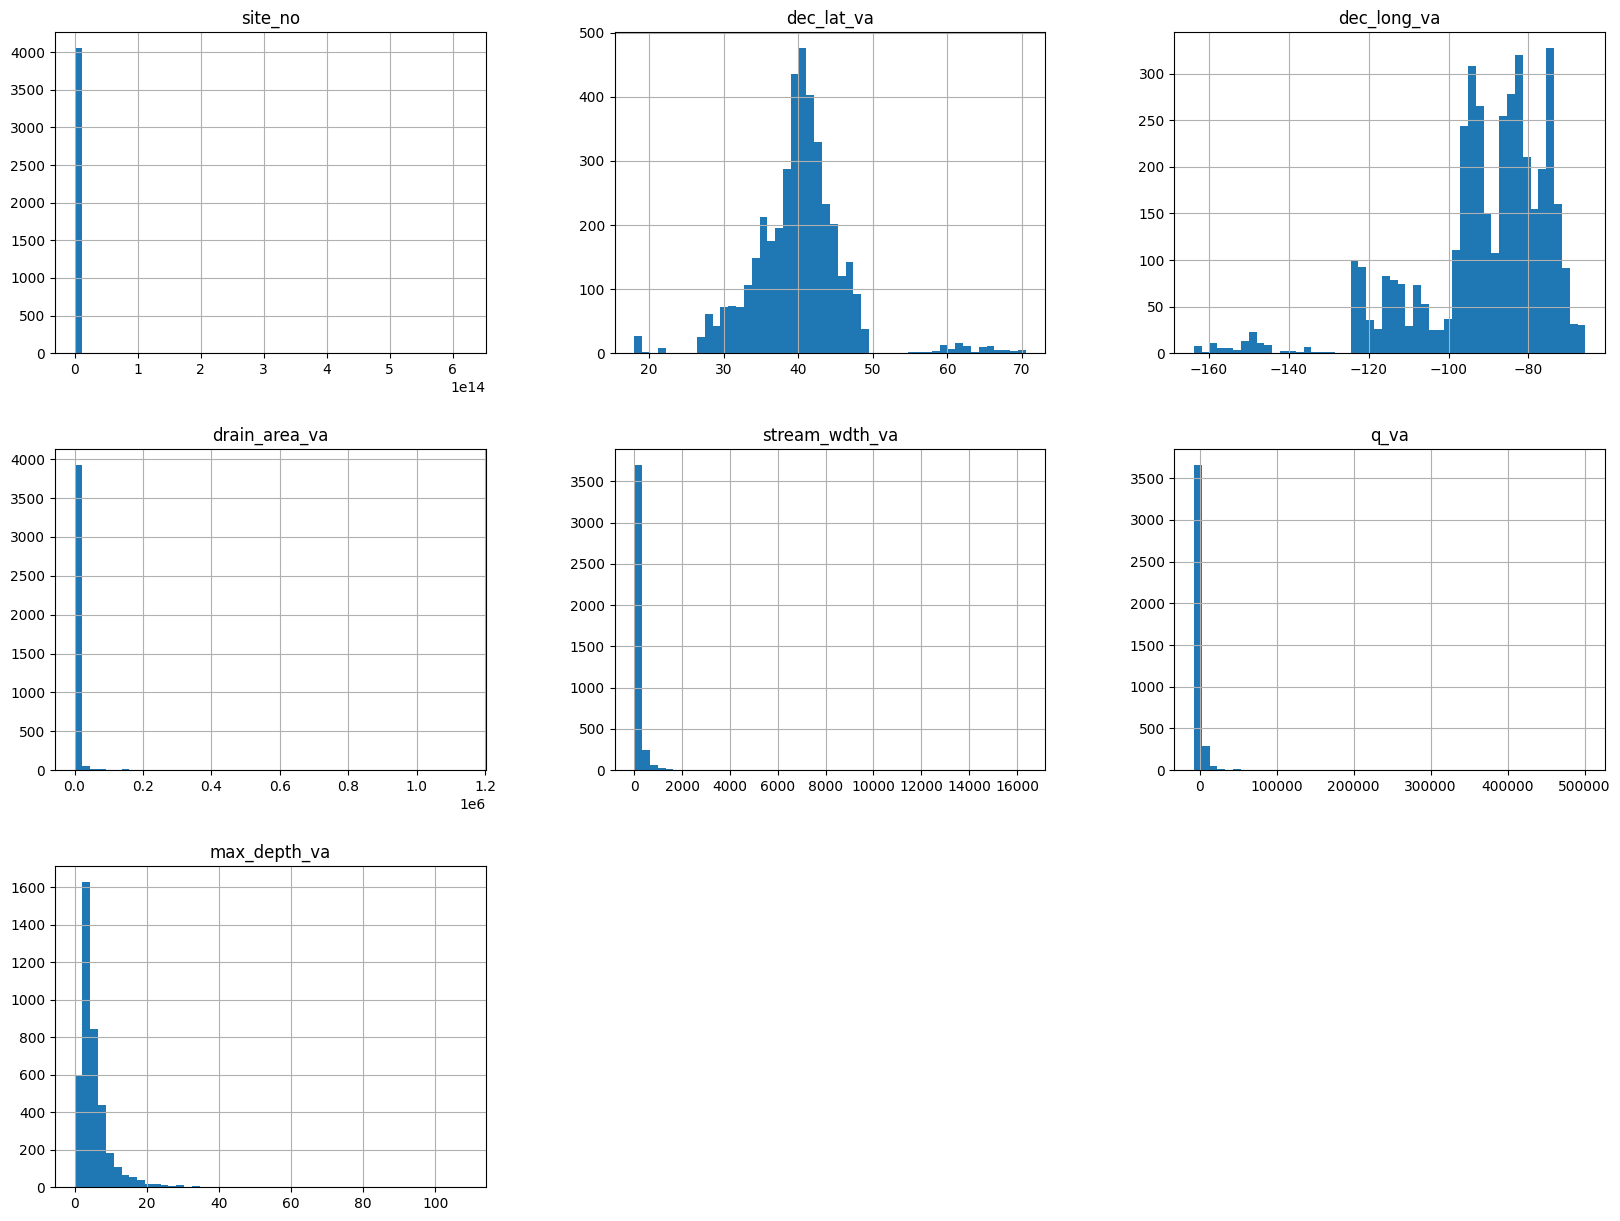

In [4]:
df5.hist(bins=50, figsize=(20,15))

In [5]:
df6 = pd.get_dummies(df5)
df6.rename(columns={'dec_lat_va':'latitude','dec_long_va':'longtitude','drain_area_va':'drainage area (m2)','stream_wdth_va':'stream width (ft)','q_va':'streamflow (ft3/s)','chan_stability_cd_FIRM':'stability_firm','chan_stability_cd_SOFT':'stability_soft','chan_stability_cd_UNSP':'stability_unspecified',
                                  'chan_mat_cd_BLDR':'material_boulder','chan_mat_cd_CBLS':'material_cobbles','chan_mat_cd_GRVL':'material_gravel','chan_mat_cd_LDGE':'material_LDGE','chan_mat_cd_SAND':'material_sand','chan_mat_cd_SILT':'material_silt','chan_mat_cd_UNSP':'material_unspecified','max_depth_va':'max depth'}, inplace=True)

print(df6.shape)
df6.head()

(4077, 17)


,site_no,latitude,longtitude,drainage area (m2),stream width (ft),streamflow (ft3/s),max depth,stability_firm,stability_soft,stability_unspecified,material_boulder,material_cobbles,material_gravel,material_LDGE,material_sand,material_silt,material_unspecified
0,1010000,46.700556,-69.715556,1341.0,210.000,2318.521,6.066,1,0,0,1,0,0,0,0,0,0
1,1010070,46.893889,-69.751667,171.0,87.413,289.939,4.167,1,0,0,1,0,0,0,0,0,0
2,1010500,47.113056,-69.088056,2680.0,521.524,3400.000,3.642,1,0,0,1,0,0,0,0,0,0
3,1011000,47.069722,-69.079444,1478.0,285.396,1668.574,4.541,1,0,0,0,1,0,0,0,0,0
4,1011500,47.206979,-68.956428,524.0,160.587,892.693,3.438,1,0,0,1,0,0,0,0,0,0


In [6]:
# visualize
# m = folium.Map(location = [44.75, -89.5], zoom_start = 2, tiles="OpenStreetMap")
# # [36.7783, -119.4179]: this is the coordinates of the center of California, searched from google
# for i in range(len(df6)):
#     folium.Marker(
#         location = [df6.loc[i,'dec_lat_va'], df6.loc[i,'dec_long_va']],
#         popup = df6.loc[i,'max_depth_va'],
#     ).add_to(m)

# m

### Data Standardization

In [7]:
df_x = df6.set_index('site_no')
df_y = df_x.pop('max depth')

df_x_1 = df_x[['latitude',
                 'longtitude',
                 'drainage area (m2)',
                 'stream width (ft)',
                 'streamflow (ft3/s)']].copy()

df_x_2 = df_x[['stability_firm',
             'stability_soft',
             'stability_unspecified',
             'material_boulder',
             'material_cobbles',
             'material_gravel',
             'material_LDGE',
             'material_sand',
             'material_silt',
             'material_unspecified']].copy()

# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

df_x_1_stats = df_x_1.describe().transpose()
df_x_1_stats_1 = standarize_data(df_x_1,df_x_1_stats)

df_x_stats_final = pd.merge(df_x_1_stats_1, df_x_2, on="site_no", how="inner")
# df_x_stats_final.rename(columns={'dec_lat_va':'latitude','dec_long_va':'longtitude','drain_area_va':'drainage area (m2)','stream_wdth_va':'stream width (ft)','q_va':'streamflow (ft3/s)','chan_stability_cd_FIRM':'stability_firm','chan_stability_cd_SOFT':'stability_soft','chan_stability_cd_UNSP':'stability_unspecified',
#                                   'chan_mat_cd_BLDR':'material_boulder','chan_mat_cd_CBLS':'material_cobbles','chan_mat_cd_GRVL':'material_gravel','chan_mat_cd_LDGE':'material_LDGE','chan_mat_cd_SAND':'material_sand','chan_mat_cd_SILT':'material_silt','chan_mat_cd_UNSP':'material_unspecified'}, inplace=True)

print(df_x_stats_final.shape)
df_x_stats_final.head()

(4077, 15)


,latitude,longtitude,drainage area (m2),stream width (ft),streamflow (ft3/s),stability_firm,stability_soft,stability_unspecified,material_boulder,material_cobbles,material_gravel,material_LDGE,material_sand,material_silt,material_unspecified
site_no,,,,,,,,,,,,,,,
1010000,1.088879,1.289115,-0.113974,0.117374,-0.033818,1,0,0,1,0,0,0,0,0,0
1010070,1.120432,1.286960,-0.136493,-0.186760,-0.141468,1,0,0,1,0,0,0,0,0,0
1010500,1.156202,1.326553,-0.088203,0.890255,0.023573,1,0,0,1,0,0,0,0,0,0
1011000,1.149129,1.327066,-0.111338,0.304429,-0.068308,1,0,0,0,1,0,0,0,0,0
1011500,1.171531,1.334406,-0.129699,-0.005218,-0.109482,1,0,0,1,0,0,0,0,0,0


In [8]:
df_y.head()

site_no
1010000    6.066
1010070    4.167
1010500    3.642
1011000    4.541
1011500    3.438
Name: max depth, dtype: float64

### Linear Regression: OLS

In [9]:
# Have dummy variables
df_x_stats_final_constant = sm.add_constant(df_x_stats_final)

model = sm.OLS(df_y, df_x_stats_final_constant).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Ordinary least squares
=====================================================================================================================
Model:                                OLS                              Adj. R-squared:                     0.446     
Dependent Variable:                   max depth                        AIC:                                24064.7645
Date:                                 2023-08-11 04:47                 BIC:                                24153.1481
No. Observations:                     4077                             Log-Likelihood:                     -12018.   
Df Model:                             13                               F-statistic:                        253.6     
Df Residuals:                         4063                             Prob (F-statistic):                 0.00      
R-squared:                            0.448                            Scale:                              21.354    
---------------------------------------------------------------------------------------------------------------------
                             Coef.              Std.Err.         t    P>|t|         [0.025               0.975]      
---------------------------------------------------------------------------------------------------------------------
const                 -4098031804016.7139 17213327453389.5820 -0.2381 0.8118 -37845586987447.3281 29649523379413.9023
latitude                          -0.3048              0.0834 -3.6534 0.0003              -0.4684             -0.1412
longtitude                        -0.1738              0.0813 -2.1371 0.0326              -0.3333             -0.0144
drainage area (m2)                 0.9821              0.0879 11.1714 0.0000               0.8097              1.1544
stream width (ft)                  1.1625              0.0864 13.4601 0.0000               0.9931              1.3318
streamflow (ft3/s)                 2.5711              0.0959 26.8154 0.0000               2.3831              2.7591
stability_firm         4324685963596.6426 18165363077808.9648  0.2381 0.8118 -31289380785287.1875 39938752712480.4688
stability_soft         4324685963596.3608 18165363077808.9648  0.2381 0.8118 -31289380785287.4688 39938752712480.1875
stability_unspecified  4324685963596.5205 18165363077808.9609  0.2381 0.8118 -31289380785287.3008 39938752712480.3438
material_boulder       -226654159574.5658   952035624419.4547 -0.2381 0.8118  -2093165725027.9189  1639857405878.7876
material_cobbles       -226654159575.1082   952035624419.4463 -0.2381 0.8118  -2093165725028.4451  1639857405878.2288
material_gravel        -226654159575.2465   952035624419.4500 -0.2381 0.8118  -2093165725028.5903  1639857405878.0977
material_LDGE          -226654159574.4737   952035624419.4503 -0.2381 0.8118  -2093165725027.8184  1639857405878.8711
material_sand          -226654159573.9319   952035624419.4460 -0.2381 0.8118  -2093165725027.2683  1639857405879.4045
material_silt          -226654159572.1682   952035624419.4473 -0.2381 0.8118  -2093165725025.5068  1639857405881.1704
material_unspecified   -226654159573.2804   952035624419.4448 -0.2381 0.8118  -2093165725026.6143  1639857405880.0537
---------------------------------------------------------------------------------------------------------------------
Omnibus:                           3752.559                    Durbin-Watson:                       1.686            
Prob(Omnibus):                     0.000                       Jarque-Bera (JB):                    400389.901       
Skew:                              4.000                       Prob(JB):                            0.000            
Kurtosis:                          50.885                      Condition No.:                       13580513866221114
====================================================================================================

In [10]:
# RMSE of the stats model
from statsmodels.tools.eval_measures import rmse
# now generate predictions
df_ypred = model.predict(df_x_stats_final_constant)
# calc rmse of the model without diet and physical activity info
RMSE = rmse(df_y, df_ypred)
RMSE

4.613150007044769

In [30]:
# cop is calculated for coefficient
coefficients1 = model.params[1:].round(4)
coefficients11 = pd.DataFrame(coefficients1)
pvalue = model.pvalues[1:]
pvalue1 = pd.DataFrame(pvalue)
cop = pd.merge(coefficients11, pvalue1, right_index = True, left_index = True)
cop[["0_x"]] = cop[["0_x"]].astype(str)

for i in range(len(cop)):
    if cop["0_y"][i] < 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "***"
    if cop["0_y"][i] < 0.01 and cop["0_y"][i] >= 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "**"
    if cop["0_y"][i] < 0.05 and cop["0_y"][i] >= 0.01:
        cop["0_x"][i] = cop["0_x"][i] + "*"

cop

<ipython-input-30-9fd80487a62a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "***"
<ipython-input-30-9fd80487a62a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "*"


,0_x,0_y
latitude,-0.3048***,2.620142e-04
longtitude,-0.1738*,3.264669e-02
drainage area (m2),0.9821***,1.461477e-28
stream width (ft),1.1625***,1.951973e-40
streamflow (ft3/s),2.5711***,5.514859e-146
stability_firm,4324685963596.6426,8.118363e-01
stability_soft,4324685963596.361,8.118363e-01
stability_unspecified,4324685963596.521,8.118363e-01
material_boulder,-226654159574.5658,8.118363e-01
material_cobbles,-226654159575.1082,8.118363e-01


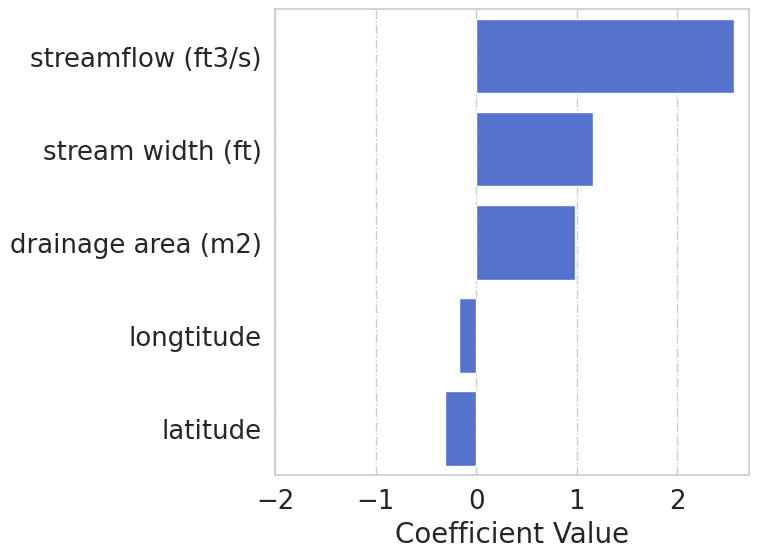

In [32]:
# Significant variables coef

coefficients = model.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
coef_data = coef_data[:5]
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("C:/Users/ryanz/OneDrive/Desktop/Coefficient Value.png",dpi=300)

In [ ]:
# No dummy variables
df_x_stats_final_constant_1 = sm.add_constant(df_x_1_stats_1)

model1 = sm.OLS(df_y, df_x_stats_final_constant_1).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.421     
Dependent Variable: max depth        AIC:                29982.9426
Date:               2023-08-10 12:22 BIC:                30022.1705
No. Observations:   5105             Log-Likelihood:     -14985.   
Df Model:           5                F-statistic:        743.4     
Df Residuals:       5099             Prob (F-statistic): 0.00      
R-squared:          0.422            Scale:              20.784    
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const                5.6764   0.0638 88.9620 0.0000  5.5513  5.8015
latitude            -0.5270   0.0708 -7.4424 0.0000 -0.6658 -0.3882
longtitude          -0.2144   0.0708 -3.0291 0.0025 -0.3532 -0.0756
drainage area (m2)   0.8037   0.0771 10.4282 0.0000  0.6526  0.9547
stream width (ft)    1.1326   0.0762 14.8683 0.0000  0.9832  1.2819
streamflow (ft3/s)   2.6160   0.0843 31.0306 0.0000  2.4507  2.7813
-------------------------------------------------------------------
Omnibus:            4353.979      Durbin-Watson:         1.673     
Prob(Omnibus):      0.000         Jarque-Bera (JB):      385808.305
Skew:               3.588         Prob(JB):              0.000     
Kurtosis:           44.980        Condition No.:         2         
===================================================================

"""

### RF

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [34]:
df_stats_final = pd.merge(df_x_stats_final, df_y, left_index=True, right_index=True, how="inner")

rf_search_train = df_stats_final.sample(frac=0.7, random_state=42)
rf_search_y = rf_search_train.pop('max depth')
rf_search_y_1 = np.ravel(rf_search_y)

number = len(rf_search_train.columns)
# Create list of max_features to be searched
max_features = [number, int(number/2), int(number/3), 'sqrt', 'log2']

In [ ]:
# Grid search - sociodemographic features
rf = RandomForestRegressor(random_state=42)

RandomForestRegressor()

pipe = Pipeline([
    ('scale', StandardScaler()), # standardization data set
    ('model', rf)
])

param_grid = [
    {'model__n_estimators': range(10, 1010, 10),
     'model__max_features':max_features},
    {'model__bootstrap':[False],
     'model__n_estimators': range(10, 1010, 10),
     'model__max_features':max_features}
]

rf_search = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
rf_search.fit(rf_search_train, rf_search_y_1)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model__max_features': [15, 7, 5, 'sqrt', 'log2'],
                          'model__n_estimators': range(10, 1010, 10)},
                         {'model__bootstrap': [False],
                          'model__max_features': [15, 7, 5, 'sqrt', 'log2'],
                          'model__n_estimators': range(10, 1010, 10)}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Optimal parameters for sociodemographic features
print(rf_search.best_params_)

{'model__max_features': 5, 'model__n_estimators': 620}


In [35]:
# feature importance table
df_feaimp = pd.DataFrame({'feature':df_x.columns}).set_index('feature')

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

y_rf_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_index = 0

avg_r_squared = 0

for train_index, test_index in ten_fold.split(df_x):
    print("TEST:", test_index)
    fold_index += 1

    X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
    y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]

    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    rf = RandomForestRegressor(bootstrap=True, n_estimators=620, max_features=5, random_state=42) # input
    rf.fit(scaled_X_train, y_train)

    ## record feature importance
    df_feaimp['fold_'+str(fold_index)] = rf.feature_importances_
    ## finish recording feature importance

    this_y_predict = rf.predict(scaled_X_test).flatten()

    y_rf_predict = y_rf_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()

    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [   8   14   17   23   26   32   33   43   44   51   52   56   70   73
   93   96   99  109  120  132  134  149  156  157  166  177  179  184
  196  205  211  214  220  229  240  251  256  263  270  291  296  298
  305  308  314  315  318  321  325  354  366  402  408  414  432  438
  457  461  463  490  495  538  544  551  555  564  568  576  596  598
  605  642  655  670  676  682  693  718  731  744  746  751  752  764
  776  790  798  802  807  809  811  818  831  838  843  862  871  888
  893  903  910  912  932  937  969  999 1003 1018 1022 1023 1025 1027
 1029 1041 1044 1047 1052 1055 1057 1061 1071 1073 1074 1091 1104 1106
 1123 1157 1159 1171 1175 1178 1186 1192 1210 1213 1222 1233 1235 1237
 1260 1263 1270 1293 1295 1298 1321 1330 1334 1340 1345 1370 1377 1395
 1405 1406 1412 1414 1421 1431 1436 1456 1461 1476 1497 1502 1511 1512
 1513 1514 1533 1536 1538 1550 1552 1556 1569 1572 1578 1586 1616 1623
 1627 1632 1650 1657 1666 1670 1672 1684 1721 1726 1727 1739 1740 1744


In [37]:
rf_rmse = mean_squared_error(y_true , y_rf_predict, squared=False)
rf_r2 = r2_score(y_true, y_rf_predict)
avg_r_squared = avg_r_squared/10

In [38]:
print("RMSE: "+str(rf_rmse))
print("R2: "+str(rf_r2)) # For R2, I took this one.
print("R2 (avg): "+str(avg_r_squared))

RMSE: 3.799240904784559
R2: 0.6255397581936981
R2 (avg): 0.617378512071699


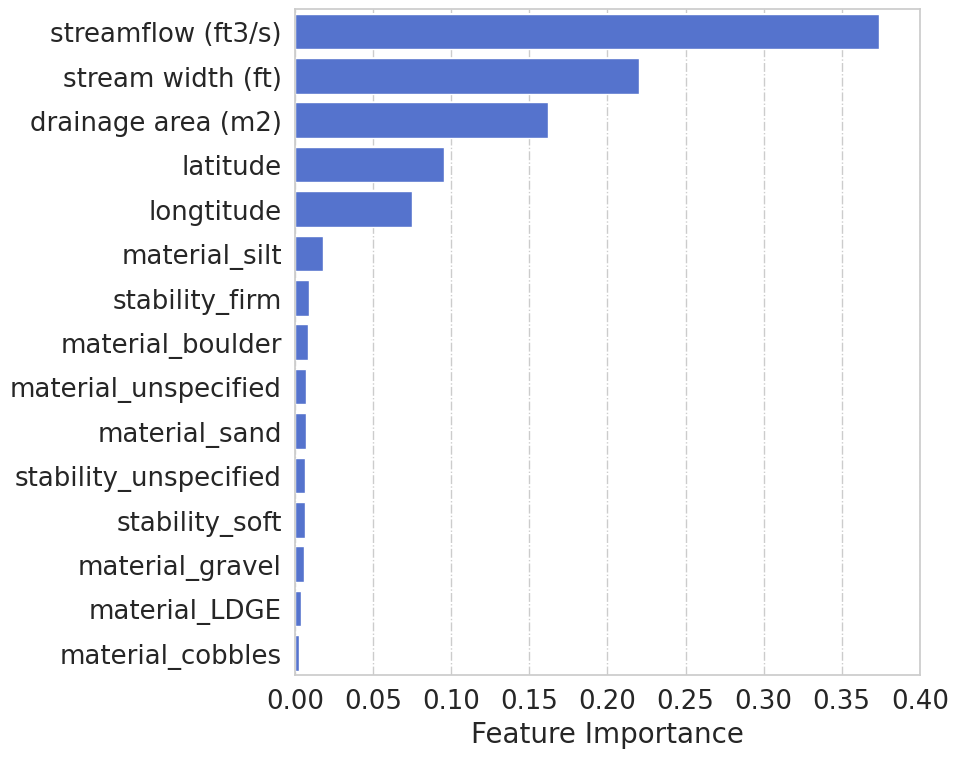

In [39]:
# Feature importance bar visualization (bar plot, this one I use)
df_feaimp["mean"] = df_feaimp.mean(axis = 1)
df_feaimp1 = df_feaimp.reset_index()
df_feaimp2 = df_feaimp1.sort_values(by = "mean", ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="feature", x="mean", data=df_feaimp2, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.4)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
#plt.savefig("C:/Users/ryanz/OneDrive/Desktop/Feature_importance.png",dpi=300)

0.0
108.448
1.6870387096774204
68.43072903225787


<Figure size 1000x800 with 0 Axes>

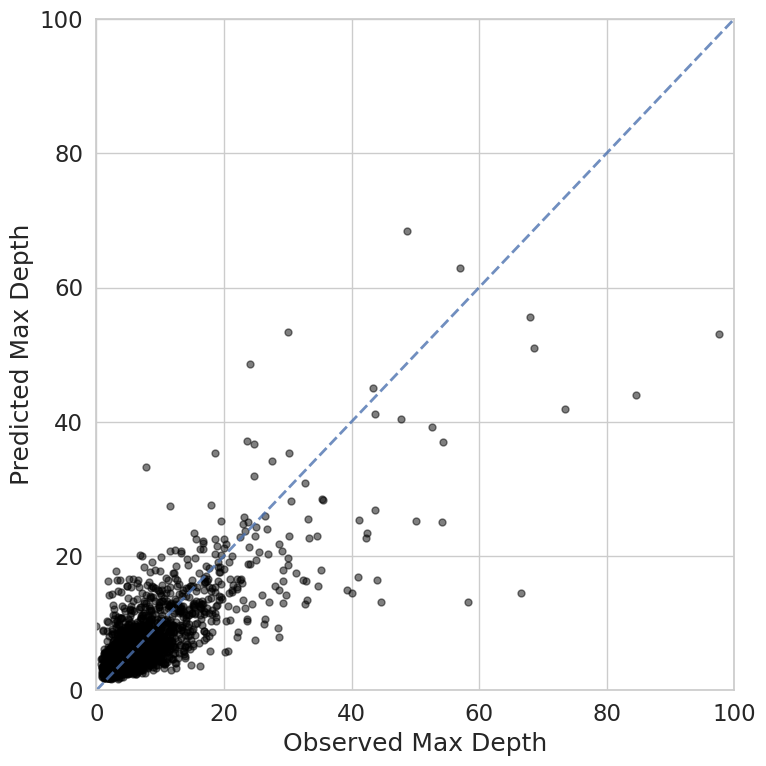

In [41]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Max Depth')
    plt.ylabel('Predicted Max Depth')
    plt.title(title)

print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_rf_predict))
print(np.max(y_rf_predict))

#scatter plot
lims = [0, 100]
prediction_scatter(y_true, y_rf_predict, lims, "")
plt.tight_layout()
# plt.savefig("../RF_pred_origin_NYC.png",dpi=300)

### DNN

In [13]:
%pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.2 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [19]:
print(rf_search_train.shape)
rf_search_train.head()

(2854, 15)


,latitude,longtitude,drainage area (m2),stream width (ft),streamflow (ft3/s),stability_firm,stability_soft,stability_unspecified,material_boulder,material_cobbles,material_gravel,material_LDGE,material_sand,material_silt,material_unspecified
site_no,,,,,,,,,,,,,,,
3377500,-0.266102,0.212765,0.411355,-0.375901,7.791458,0,0,1,0,0,0,0,0,0,1
4208000,0.223029,0.578286,-0.126177,-0.125577,-0.138276,1,0,0,0,0,1,0,0,0,0
1467087,-0.002097,0.968057,-0.139200,-0.258244,-0.148735,1,0,0,0,0,0,1,0,0,0
1410784,-0.048176,0.976752,-0.139494,-0.354528,-0.156122,1,0,0,0,0,0,0,1,0,0
6803500,0.133483,-0.319734,-0.126600,0.010740,-0.016590,0,0,1,0,0,0,0,1,0,0


In [20]:
rf_search_y_1

array([6.916, 2.936, 2.16 , ..., 2.39 , 2.93 , 1.695])

In [24]:
# Quick run before tuning hyperparameters
tf.random.set_seed(42)
# https://cnbeining.github.io/deep-learning-with-python-cn/4-advanced-multi-layer-perceptrons-and-keras/ch16-reduce-overfitting-with-dropout-regularization.html
dnn_model = keras.models.Sequential([
    keras.layers.Dense(256,activation="relu"), # Dense means fully connected.
    keras.layers.Dropout(0.2), # prevent overfitting
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [25]:
history = dnn_model.fit(x=rf_search_train, y=rf_search_y_1, validation_split=0.1, epochs=50, verbose=2)

Epoch 1/50
101/101 - 3s - loss: 40.3565 - mean_squared_error: 40.3565 - val_loss: 13.8644 - val_mean_squared_error: 13.8644 - 3s/epoch - 31ms/step
Epoch 2/50
101/101 - 1s - loss: 25.2663 - mean_squared_error: 25.2663 - val_loss: 10.9946 - val_mean_squared_error: 10.9946 - 657ms/epoch - 7ms/step
Epoch 3/50
101/101 - 0s - loss: 21.8581 - mean_squared_error: 21.8581 - val_loss: 14.1884 - val_mean_squared_error: 14.1884 - 413ms/epoch - 4ms/step
Epoch 4/50
101/101 - 0s - loss: 22.0405 - mean_squared_error: 22.0405 - val_loss: 11.6267 - val_mean_squared_error: 11.6267 - 398ms/epoch - 4ms/step
Epoch 5/50
101/101 - 0s - loss: 18.5889 - mean_squared_error: 18.5889 - val_loss: 8.2755 - val_mean_squared_error: 8.2755 - 385ms/epoch - 4ms/step
Epoch 6/50
101/101 - 0s - loss: 18.9994 - mean_squared_error: 18.9994 - val_loss: 12.2036 - val_mean_squared_error: 12.2036 - 446ms/epoch - 4ms/step
Epoch 7/50
101/101 - 0s - loss: 18.1225 - mean_squared_error: 18.1225 - val_loss: 7.9787 - val_mean_squared_er

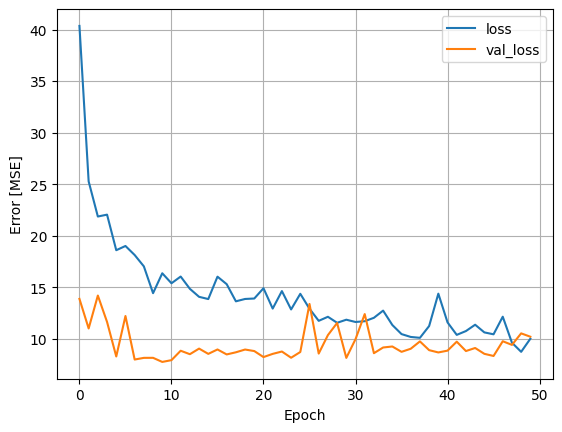

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [28]:
#make prediction
y_pred = dnn_model.predict(rf_search_train)

#evaluate with groud truth
y_pred_r2 = r2_score(rf_search_y_1, y_pred)
y_pred_rsme = mean_squared_error(rf_search_y_1, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

112/112 [==============================] - 0s 2ms/step
0.7901966012487832
2.88661268459941


In [29]:
import os

def build_model(hp):
    model = keras.models.Sequential()

    for i in range(hp.Int("num_layer",1,10)):
        model.add(keras.layers.Dense(units=hp.Int("neuron_"+str(i),16,256, step=16), activation="relu"))

        for j in range(hp.Int("num_drop_layer_"+str(i),0,1)):
            model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Dense(1))

    model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

    return model

tuner = RandomSearch(build_model, objective="val_loss", max_trials=50, executions_per_trial=5 ,seed=42, overwrite=True, directory=os.path.normpath('C:/Users/yhu42/yhu42/hyper'))

In [30]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neuron_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': 'linear'}
num_drop_layer_0 (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 1, 'step': 1, 'sampling': 'linear'}


In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(rf_search_train, rf_search_y_1, validation_split=0.1, epochs=50,  callbacks=[early_stop], verbose=2)

Trial 50 Complete [00h 01m 51s]
val_loss: 1.79493408203125

Best val_loss So Far: 1.7713121175765991
Total elapsed time: 01h 48m 45s


In [32]:
tuner.results_summary()

Results summary
Results in C:/Users/yhu42/yhu42/hyper/untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 47 summary
Hyperparameters:
num_layer: 2
neuron_0: 240
num_drop_layer_0: 0
neuron_1: 224
num_drop_layer_1: 1
neuron_2: 256
num_drop_layer_2: 0
neuron_3: 112
num_drop_layer_3: 1
neuron_4: 144
num_drop_layer_4: 1
neuron_5: 208
num_drop_layer_5: 0
neuron_6: 32
num_drop_layer_6: 1
neuron_7: 256
num_drop_layer_7: 1
neuron_8: 224
num_drop_layer_8: 0
neuron_9: 256
num_drop_layer_9: 0
Score: 1.7713121175765991

Trial 32 summary
Hyperparameters:
num_layer: 2
neuron_0: 192
num_drop_layer_0: 0
neuron_1: 240
num_drop_layer_1: 1
neuron_2: 240
num_drop_layer_2: 1
neuron_3: 144
num_drop_layer_3: 0
neuron_4: 32
num_drop_layer_4: 0
neuron_5: 80
num_drop_layer_5: 1
neuron_6: 208
num_drop_layer_6: 0
neuron_7: 144
num_drop_layer_7: 0
neuron_8: 64
num_drop_layer_8: 0
neuron_9: 176
num_drop_layer_9: 0
Score: 1.7826563358306884

Trial 49 summary
Hyperparameters:
num

In [33]:
best_hps = tuner.get_best_hyperparameters()[0]
layer_count = best_hps.get("num_layer")
print("The number of layer is: "+ str(layer_count))
for i in range(layer_count):
  print("Neuron for layer_"+str(i)+" is: "+str(best_hps.get("neuron_"+str(i))))
  print("Dropout for layer_"+str(i)+" is: "+str(best_hps.get("num_drop_layer_"+str(i))))

The number of layer is: 2
Neuron for layer_0 is: 240
Dropout for layer_0 is: 0
Neuron for layer_1 is: 224
Dropout for layer_1 is: 1


In [21]:
df_x.head()

,latitude,longtitude,drainage area (m2),stream width (ft),streamflow (ft3/s),stability_firm,stability_soft,stability_unspecified,material_boulder,material_cobbles,material_gravel,material_LDGE,material_sand,material_silt,material_unspecified
site_no,,,,,,,,,,,,,,,
1010000,46.700556,-69.715556,1341.0,210.000,2318.521,1,0,0,1,0,0,0,0,0,0
1010070,46.893889,-69.751667,171.0,87.413,289.939,1,0,0,1,0,0,0,0,0,0
1010500,47.113056,-69.088056,2680.0,521.524,3400.000,1,0,0,1,0,0,0,0,0,0
1011000,47.069722,-69.079444,1478.0,285.396,1668.574,1,0,0,0,1,0,0,0,0,0
1011500,47.206979,-68.956428,524.0,160.587,892.693,1,0,0,1,0,0,0,0,0,0


In [22]:
df_y.head()

site_no
1010000    6.066
1010070    4.167
1010500    3.642
1011000    4.541
1011500    3.438
Name: max depth, dtype: float64

In [23]:
# new code

y_dnn_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(df_x):
    print("TEST:", test_index)

    X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
    y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]

    #scaler = StandardScaler()

    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)

    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    tf.random.set_seed(42)
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(240,activation="relu"),
        keras.layers.Dense(224,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=2)

    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_predict = y_dnn_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()

    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [   8   14   17   23   26   32   33   43   44   51   52   56   70   73
   93   96   99  109  120  132  134  149  156  157  166  177  179  184
  196  205  211  214  220  229  240  251  256  263  270  291  296  298
  305  308  314  315  318  321  325  354  366  402  408  414  432  438
  457  461  463  490  495  538  544  551  555  564  568  576  596  598
  605  642  655  670  676  682  693  718  731  744  746  751  752  764
  776  790  798  802  807  809  811  818  831  838  843  862  871  888
  893  903  910  912  932  937  969  999 1003 1018 1022 1023 1025 1027
 1029 1041 1044 1047 1052 1055 1057 1061 1071 1073 1074 1091 1104 1106
 1123 1157 1159 1171 1175 1178 1186 1192 1210 1213 1222 1233 1235 1237
 1260 1263 1270 1293 1295 1298 1321 1330 1334 1340 1345 1370 1377 1395
 1405 1406 1412 1414 1421 1431 1436 1456 1461 1476 1497 1502 1511 1512
 1513 1514 1533 1536 1538 1550 1552 1556 1569 1572 1578 1586 1616 1623
 1627 1632 1650 1657 1666 1670 1672 1684 1721 1726 1727 1739 1740 1744


In [24]:
dnn_rmse = mean_squared_error(y_true , y_dnn_predict, squared=False)
dnn_r2 = r2_score(y_true, y_dnn_predict)
avg_r_squared = avg_r_squared/10

In [25]:
print("RMSE: "+str(dnn_rmse))
print("R2: "+str(dnn_r2)) # for R2, I use this one.
print("R2 (avg): "+str(avg_r_squared))

RMSE: 4.603132467308809
R2: 0.45030853398013937
R2 (avg): 0.4377558105480318


In [26]:
# new code

y_dnn_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(df_x):
    print("TEST:", test_index)

    X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
    y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]

    #scaler = StandardScaler()

    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)

    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    dnn_model = keras.models.Sequential([
    keras.layers.Dense(256,activation="relu"), # Dense means fully connected.
    keras.layers.Dropout(0.2), # prevent overfitting
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
    ])


    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=2)

    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_predict = y_dnn_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()

    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [   8   14   17   23   26   32   33   43   44   51   52   56   70   73
   93   96   99  109  120  132  134  149  156  157  166  177  179  184
  196  205  211  214  220  229  240  251  256  263  270  291  296  298
  305  308  314  315  318  321  325  354  366  402  408  414  432  438
  457  461  463  490  495  538  544  551  555  564  568  576  596  598
  605  642  655  670  676  682  693  718  731  744  746  751  752  764
  776  790  798  802  807  809  811  818  831  838  843  862  871  888
  893  903  910  912  932  937  969  999 1003 1018 1022 1023 1025 1027
 1029 1041 1044 1047 1052 1055 1057 1061 1071 1073 1074 1091 1104 1106
 1123 1157 1159 1171 1175 1178 1186 1192 1210 1213 1222 1233 1235 1237
 1260 1263 1270 1293 1295 1298 1321 1330 1334 1340 1345 1370 1377 1395
 1405 1406 1412 1414 1421 1431 1436 1456 1461 1476 1497 1502 1511 1512
 1513 1514 1533 1536 1538 1550 1552 1556 1569 1572 1578 1586 1616 1623
 1627 1632 1650 1657 1666 1670 1672 1684 1721 1726 1727 1739 1740 1744


In [27]:
dnn_rmse = mean_squared_error(y_true , y_dnn_predict, squared=False)
dnn_r2 = r2_score(y_true, y_dnn_predict)
avg_r_squared = avg_r_squared/10

In [28]:
print("RMSE: "+str(dnn_rmse))
print("R2: "+str(dnn_r2)) # for R2, I use this one.
print("R2 (avg): "+str(avg_r_squared))

RMSE: 4.666866585287076
R2: 0.4349813024366328
R2 (avg): 0.4154200226848729
